In [2]:
# notebooks/preprocess_main.ipynb
import os
import sys
import pandas as pd
# Add the scripts directory to the Python path
scripts_path = os.path.abspath('../scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

try:
    
    from preprocess_reviews import ReviewPreprocessor

except ModuleNotFoundError:
    # If the import fails, provide a helpful error message
    raise ModuleNotFoundError(
        "Could not find 'preprocess_reviews.py' in '../scripts'. "
        "Please ensure the file exists and the path is correct."
    )



input_path = '../data/raw_reviews.csv'
output_path = '../data/cleaned_reviews.csv'

df = pd.read_csv(input_path)

preprocessor = ReviewPreprocessor(df)
preprocessor.drop_missing()
preprocessor.drop_duplicates()
preprocessor.normalize_dates()
preprocessor.prepare_columns()
clean_df = preprocessor.get_cleaned_data()

clean_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Cleaned data saved to {output_path}")

clean_df.head(100)


Dropped 0 missing rows
Dropped 0 duplicates
Dropped 0 bad dates
Cleaned data saved to ../data/cleaned_reviews.csv


,review,rating,date,bank,source,language
0,love,3,2025-06-06,Dashen Bank,Google Play,en
1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,en
2,wow,5,2025-06-03,Dashen Bank,Google Play,en
3,gadaa,5,2025-06-01,Dashen Bank,Google Play,en
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en
...,...,...,...,...,...,...
95,"This super app is a total game-changer—fast, r...",5,2025-04-23,Dashen Bank,Google Play,en
96,All in One ✍️secure ✍️reliable ✍️convenient. D...,5,2025-04-23,Dashen Bank,Google Play,en
97,it is incredible product.,5,2025-04-23,Dashen Bank,Google Play,en
98,I'm really impressed with this app! It’s user-...,5,2025-04-23,Dashen Bank,Google Play,en


In [16]:
clean_df.info()
# Display the first few rows of the cleaned DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    2963 non-null   object
 1   rating    2963 non-null   int64 
 2   date      2963 non-null   object
 3   bank      2963 non-null   object
 4   source    2963 non-null   object
 5   language  2963 non-null   object
dtypes: int64(1), object(5)
memory usage: 139.0+ KB


In [15]:
clean_df.shape

(2963, 6)

In [17]:
clean_df.describe()

,rating
count,2963.000000
mean,3.909889
std,1.637151
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
# Count number of reviews per bank
review_counts = clean_df['bank'].value_counts().reset_index()
review_counts.columns = ['Bank Name', 'Number of Reviews']
#review_counts = df_cleaned['bank'].value_counts().reset_index()
#review_counts.columns = ['Bank Name', 'Number of Reviews']

print(review_counts)


                     Bank Name  Number of Reviews
0  Commercial Bank of Ethiopia               1054
1            Bank of Abyssinia               1012
2                  Dashen Bank                897


In [25]:
clean_df.groupby('bank').size().reset_index(name='Number of Reviews')
# Group by 'bank' and count the number of reviews for each bank
# Display the review counts DataFrame

review_counts.head()
# Save to CSV
os.makedirs('data', exist_ok=True)

review_counts.to_csv('data/review_counts_per_bank.csv', index=False, encoding='utf-8-sig')
print("✅ Review counts saved to 'data/review_counts_per_bank.csv'")
# Display the first few rows of the review counts DataFrame

✅ Review counts saved to 'data/review_counts_per_bank.csv'


  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------

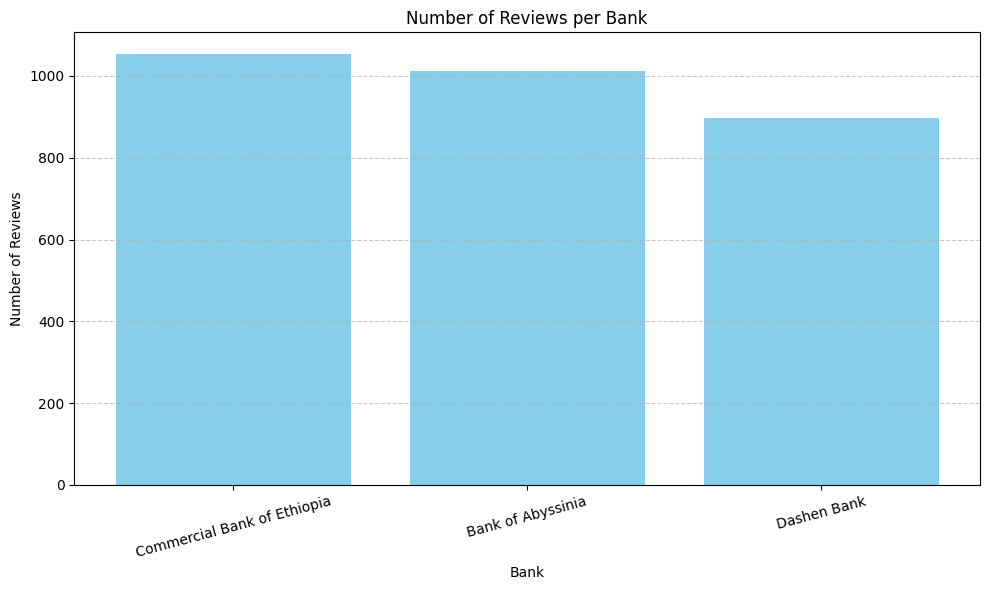

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(review_counts['Bank Name'], review_counts['Number of Reviews'], color='skyblue')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\getde\AppData\Local\Temp\ipykernel_30456\3867367694.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_counts, x='Bank Name', y='Number of Reviews', palette='viridis')


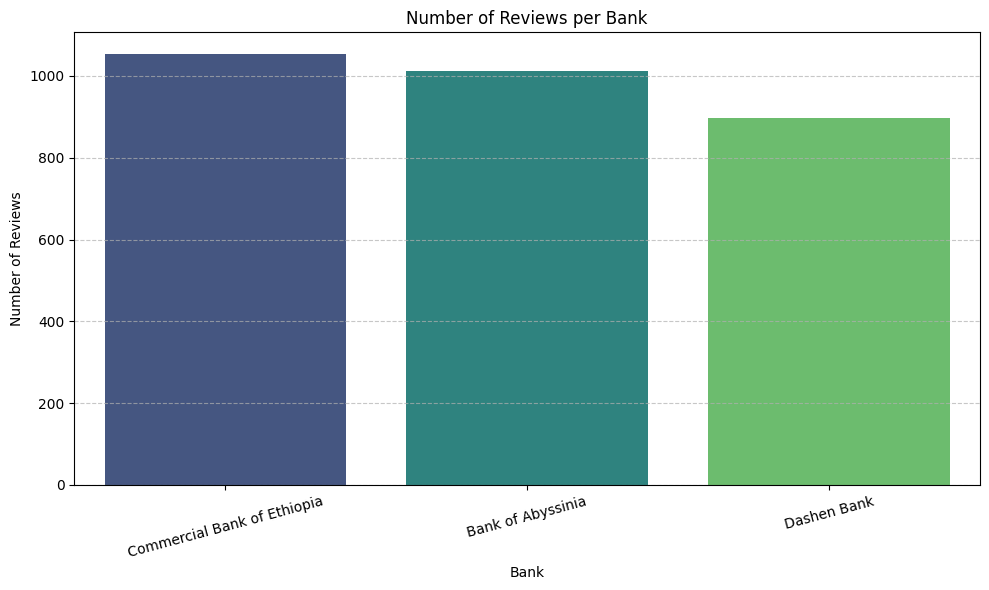

In [28]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=review_counts, x='Bank Name', y='Number of Reviews', palette='viridis')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
